In [1]:
#importing hierarchical clustering libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn
#hierarchical clustering liberaries
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans 

In [2]:
#reading the file
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


there are no null values

In [5]:
crime.rename({"Unnamed: 0":"unnamed"},axis=1,inplace=True)

In [7]:
crime.head()

,unnamed,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Hierarchical clustering

In [8]:
#Normilzation function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
#normalized data frame (considering the numerical part of the data)
df_norm = norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


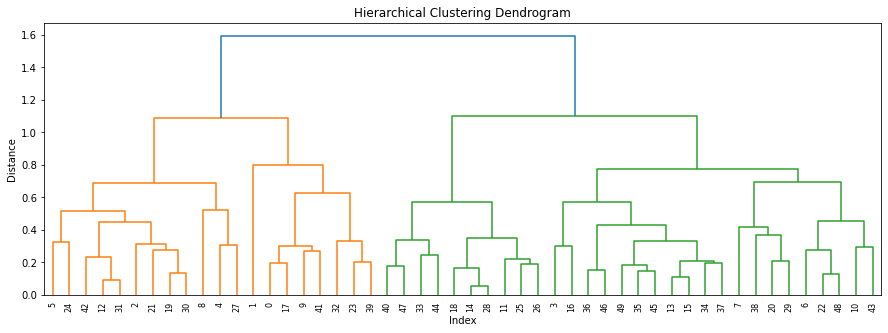

In [17]:
#creating the dendrogram
plt.figure(figsize=(15,5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
dendrogram = sch.dendrogram(sch.linkage(df_norm, method="complete"))

In [18]:
#creating the clusters 
hc = AgglomerativeClustering(n_clusters=5 , affinity="euclidean", linkage="complete")

In [53]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [21]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [22]:
crime["h_clusterid"]=y_hc

In [23]:
crime.head()

,unnamed,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [25]:
crime.groupby(["h_clusterid"])["unnamed"].apply(lambda x:tuple(x))

h_clusterid
0    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
1    (Arizona, California, Colorado, Florida, Illin...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4                                            (Alaska,)
Name: unnamed, dtype: object

# K Means clustering

In [27]:
crime=pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [29]:
crime.rename({"Unnamed: 0":"unnamed"},axis=1,inplace=True)
crime.head()

,unnamed,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [54]:
'''from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_crime_df = scalar.fit_transform(crime.iloc[:,1:])
scaled_crime_df'''

'from sklearn.preprocessing import StandardScaler\nscalar = StandardScaler()\nscaled_crime_df = scalar.fit_transform(crime.iloc[:,1:])\nscaled_crime_df'

In [55]:
'''#finding out the optimal no of clusters
nc = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    nc.append(kmeans.inertia_)'''
        
    

'#finding out the optimal no of clusters\nnc = []\nfor i in range(1,11):\n    kmeans = KMeans(n_clusters=i,random_state=0)\n    kmeans.fit(scaled_crime_df)\n    nc.append(kmeans.inertia_)'

In [56]:
'''plt.plot(range(1,11),nc)
plt.scatter(range(1,11),nc,color="red")
plt.title("Elbow Method")
plt.xlabel("Number of clussters")
plt.ylabel('nc')
plt.show()'''

'plt.plot(range(1,11),nc)\nplt.scatter(range(1,11),nc,color="red")\nplt.title("Elbow Method")\nplt.xlabel("Number of clussters")\nplt.ylabel(\'nc\')\nplt.show()'

In [31]:
model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [32]:
model_kmeans.labels_

array([1, 2, 2, 4, 2, 2, 0, 4, 2, 1, 0, 3, 2, 4, 3, 4, 4, 1, 3, 2, 0, 2,
       3, 1, 4, 4, 4, 2, 3, 0, 2, 2, 1, 3, 0, 4, 4, 0, 0, 1, 3, 1, 2, 0,
       3, 4, 0, 3, 3, 4])

In [52]:
md=pd.Series(model_kmeans.labels_)


In [38]:
crime["km_clusterid"] = pd.Series(model_kmeans.labels_)
crime.head()

,unnamed,Murder,Assault,UrbanPop,Rape,km_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,2


In [40]:
crime.groupby(["km_clusterid"])["unnamed"].apply(lambda x:tuple(x))

km_clusterid
0    (Connecticut, Hawaii, Massachusetts, New Jerse...
1    (Alabama, Georgia, Louisiana, Mississippi, Nor...
2    (Alaska, Arizona, California, Colorado, Florid...
3    (Idaho, Iowa, Maine, Minnesota, New Hampshire,...
4    (Arkansas, Delaware, Indiana, Kansas, Kentucky...
Name: unnamed, dtype: object

# DBSCAN

In [41]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [42]:
from sklearn.datasets import make_moons
x,y=make_moons(100)
data = pd.DataFrame(x)
data.columns=["f1","f2"]
data["class"]=y
data.head()

,f1,f2,class
0,0.718349,0.695683,0
1,0.840400,-0.487182,1
2,0.159600,0.987182,0
3,-0.518393,0.855143,0
4,-0.623490,0.781831,0


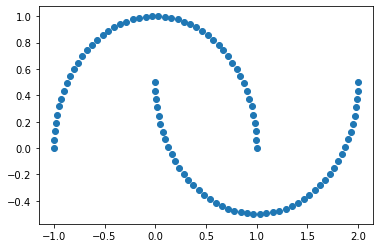

In [57]:
plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)

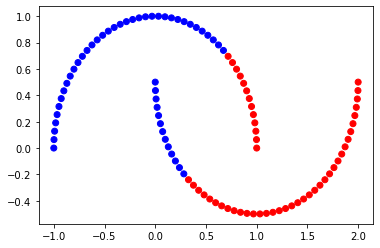

In [59]:
#using kmeans
model = KMeans(n_clusters=2,max_iter = 600 , algorithm ='auto')
model.fit(data.iloc[:,:2])
plt.scatter(data['f1'],data["f2"],c=model.labels_,cmap=plt.cm.bwr_r)

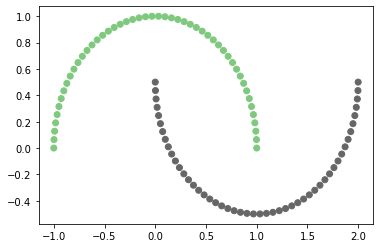

In [60]:
#DBSCAN
dbs = DBSCAN(min_samples=2,eps=0.2)
claas_pr = dbs.fit_predict(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=claas_pr,cmap=plt.cm.Accent)

In [61]:
claas_pr

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

# Finding the optimal number of clusters

In [64]:
import seaborn as sns
import pandas as pd 

In [66]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [67]:
nc=[2,3,4,5,6,7,8,9]
iner=[]
for i in nc:
    km=KMeans(i)
    km.fit(crime.iloc[:,1:])
    iner.append(km.inertia_)

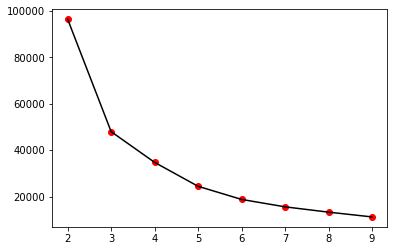

In [68]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [69]:
#silhouette score
from sklearn.metrics import silhouette_score as sil

In [70]:
nc=[2,3,4,5,6,7,8,9]
sc_score = []
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="complete")
    
    y=hc.fit_predict(crime.iloc[:,1:])
    sc_score.append(sil(crime.iloc[:,1:],y))

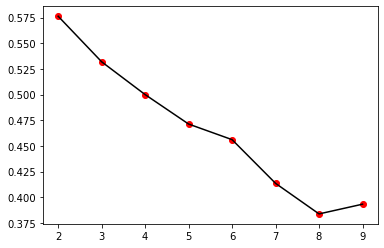

In [71]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()